In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA



In [ ]:
# Load features (column names)
features = pd.read_csv("features.txt", sep="\s+", header=None, names=["index", "name"])
feature_names = features["name"].values
# Load training and testing data
X_train = pd.read_csv("X_train.txt", sep="\s+", header=None)
X_test = pd.read_csv("X_test.txt", sep="\s+", header=None)

# Combine train + test
X = pd.concat([X_train, X_test], axis=0)


In [ ]:
#  Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#  Apply KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)


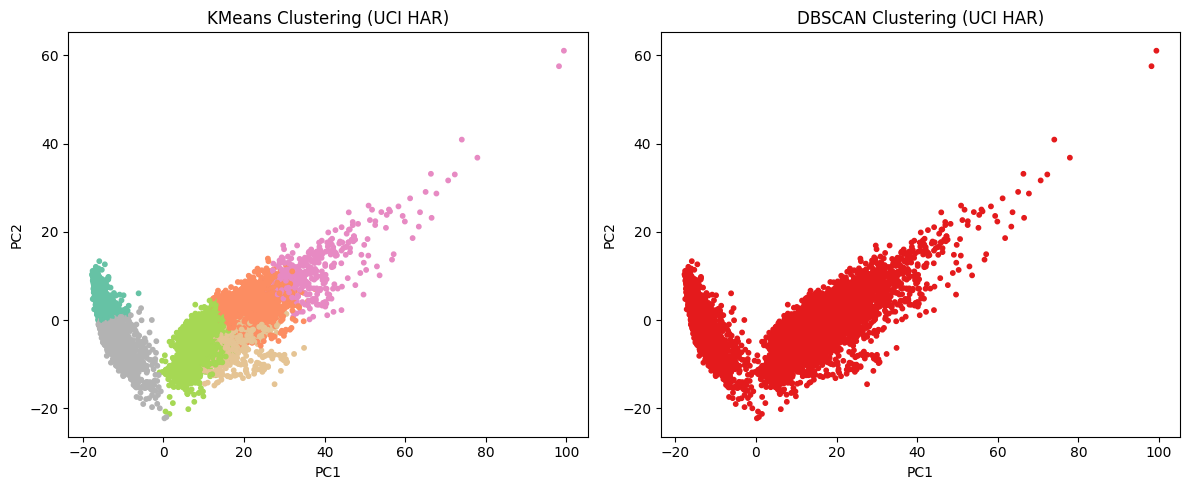

In [ ]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='Set2', s=10)
plt.title("KMeans Clustering (UCI HAR)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='Set1', s=10)
plt.title("DBSCAN Clustering (UCI HAR)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()
